# Import Libraries

In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
from sklearn.datasets import fetch_olivetti_faces

# Grayscale Images

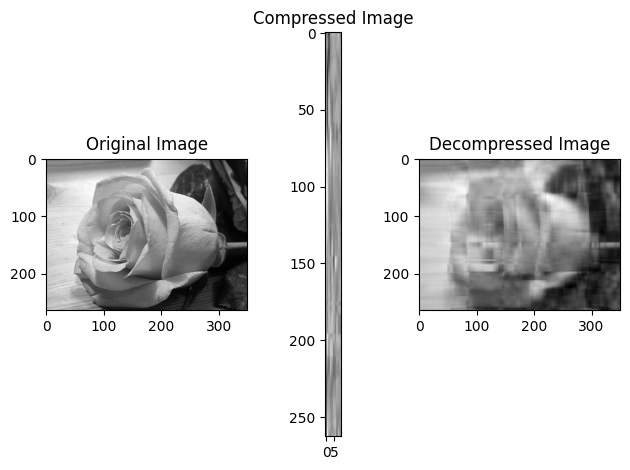

In [2]:
def compress_image(image, k):
    # Convert image to matrix representation and standardize
    image_matrix = np.array(image).astype(float)
    image_matrix=image_matrix/255.0

    # Subtract the mean from each column
    mean = np.mean(image_matrix, axis=0)
    centered_matrix = image_matrix - mean

    # calculate covariance matrix
    covariance_matrix = np.cov(centered_matrix, rowvar=False)

    # claculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort eigenvectors based on eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Select top k eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :k]

    # Project  the   centered data  on  selected eigenvectors   (orthogonal)
    compressed_representation = np.dot(centered_matrix, selected_eigenvectors)

    return compressed_representation, mean, selected_eigenvectors

def decompress_image(compressed_image, mean, eigenvectors):
    # Multiply compressed image by eigenvectors
    reconstructed_image = np.dot(compressed_image, eigenvectors.T)#+mean

    # Add the mean back and rescale
    reconstructed_image += mean  # to remove scaling

    return reconstructed_image
# Load the grayscale image
image = io.imread('https://images.freeimages.com/images/large-previews/308/grayscale-rose-1478187.jpg?fmt=webp&w=350', as_gray=True)



# Compress the image
k = 10  # Number of principal components  (number of PCA)
compressed_image, mean, eigenvectors = compress_image(image, k)
compressed_image = np.real(compressed_image)

# Decompress the image
reconstructed_image = decompress_image(compressed_image, mean, eigenvectors)

# Visualize the compressed and decompressed images
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')



plt.subplot(1, 3, 2)

# plt.ylim(0, 50)

plt.imshow(compressed_image, cmap='gray')
plt.title('Compressed Image')


plt.subplot(1, 3, 3)
plt.imshow(np.real(reconstructed_image), cmap='gray')
plt.title('Decompressed Image')

plt.tight_layout()

plt.show()


# Colored Image

<ipython-input-3-954da056826b>:72: ComplexWarning: Casting complex values to real discards the imaginary part
  return reconstructed_image.astype('uint8')


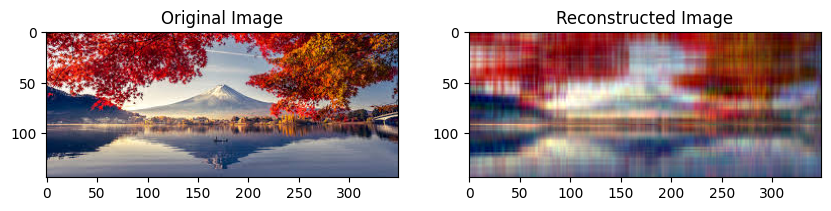

In [3]:
# image_path = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTgf48x3wcFMN1udiL_f7m_BYz57ZNokbJ5zA&usqp=CAU"
# image_path = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSKXYSs2F_0O04sLv8AjIH43Owr2rEIfkFEOA&usqp=CAU"
image_path = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSCZlf5lc5tX-0gY-y94pGS0mQdL-D0lCH2OQ&usqp=CAU"

# Load the image

image = io.imread(image_path)
# plt.imshow(image)

img_array = np.array(image)
# Separate color channels

red, green, blue = img_array[:,:,0], img_array[:,:,1], img_array[:,:,2]


def pca(image, k):
    # Standardize the image
    image = image / 255.0

    # Compute the mean
    mean = np.mean(image, axis=0)

    # Center the data
    centered_data = image - mean

    # Compute the covariance matrix
    covariance_matrix = np.cov(centered_data, rowvar=False)

    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort the eigenvalues and corresponding eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top k eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :k]

    # Project the centered data onto the selected eigenvectors
    projected_data = np.dot(centered_data, selected_eigenvectors)


    return projected_data, mean, selected_eigenvectors



# Apply PCA to each color channel
red_projected, red_mean, red_eigenvectors = pca(red, k=5)
green_projected, green_mean, green_eigenvectors = pca(green, k=5)
blue_projected, blue_mean, blue_eigenvectors = pca(blue, k=5)



# Combine color channels

# constructed_img = np.dstack((red_projected, green_projected, blue_projected))


def reconstruct_image(projected_data, mean, eigenvectors):
    # Reconstruct the image
    reconstructed_image = np.dot(projected_data, eigenvectors.T)

    # Add the mean back
    reconstructed_image += mean

    # Rescale the image
    reconstructed_image = reconstructed_image * 255.0

    # Clip values to be between 0 and 255
    reconstructed_image = np.clip(reconstructed_image, 0, 255)

    return reconstructed_image.astype('uint8')

# Reconstruct each color channel
red_reconstructed = reconstruct_image(red_projected, red_mean, red_eigenvectors)
green_reconstructed = reconstruct_image(green_projected, green_mean, green_eigenvectors)
blue_reconstructed = reconstruct_image(blue_projected, blue_mean, blue_eigenvectors)

# Combine color channels
reconstructed_img = np.dstack((red_reconstructed, green_reconstructed, blue_reconstructed))



# Plot original and reconstructed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.title('Original Image')

# plt.subplot(1, 3, 2)
# plt.imshow(img_array)
# plt.title('constructed Image')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img)
plt.title('Reconstructed Image')


# plt.tight_layout()

plt.show()

<ipython-input-4-9c43fc7dbb5f>:58: ComplexWarning: Casting complex values to real discards the imaginary part
  return reconstructed_image.astype('uint8')
<ipython-input-4-9c43fc7dbb5f>:76: ComplexWarning: Casting complex values to real discards the imaginary part
  red_projected_rescaled = red_projected_rescaled.astype('uint8')
<ipython-input-4-9c43fc7dbb5f>:77: ComplexWarning: Casting complex values to real discards the imaginary part
  green_projected_rescaled = green_projected_rescaled.astype('uint8')
<ipython-input-4-9c43fc7dbb5f>:78: ComplexWarning: Casting complex values to real discards the imaginary part
  blue_projected_rescaled = blue_projected_rescaled.astype('uint8')


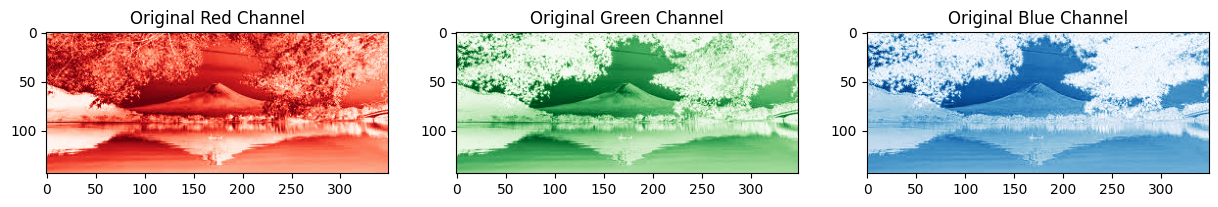

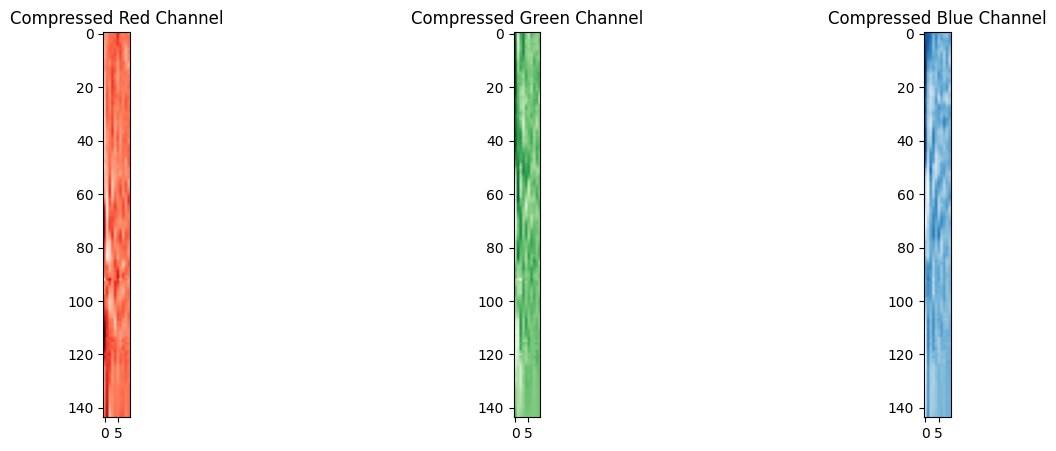

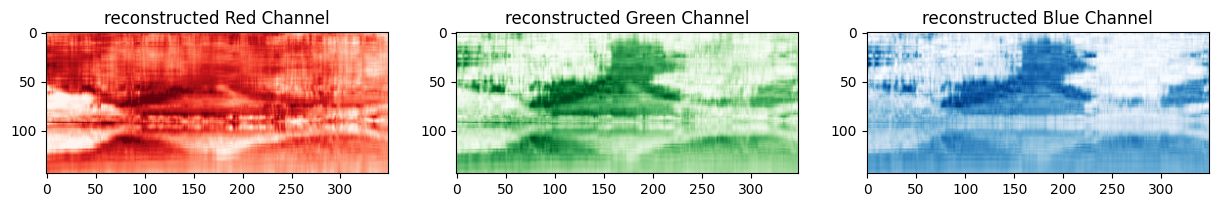

In [4]:
image_path = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSCZlf5lc5tX-0gY-y94pGS0mQdL-D0lCH2OQ&usqp=CAU"
image = io.imread(image_path)
# plt.imshow(image)

img_array = np.array(image)

red, green, blue = img_array[:,:,0], img_array[:,:,1], img_array[:,:,2]


def pca(image, k):
    # Standardize the image
    image = image / 255.0

    # Compute the mean
    mean = np.mean(image, axis=0)

    # Center the data
    centered_data = image - mean

    # Compute the covariance matrix
    covariance_matrix = np.cov(centered_data, rowvar=False)

    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort the eigenvalues and corresponding eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top k eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :k]

    # Project the centered data onto the selected eigenvectors
    projected_data = np.dot(centered_data, selected_eigenvectors)

    return projected_data, mean, selected_eigenvectors



# Apply PCA to each color channel
red_projected, red_mean, red_eigenvectors = pca(red, k=10)
green_projected, green_mean, green_eigenvectors = pca(green, k=10)
blue_projected, blue_mean, blue_eigenvectors = pca(blue, k=10)

def reconstruct_image(projected_data, mean, eigenvectors):
    # Reconstruct the image
    reconstructed_image = np.dot(projected_data, eigenvectors.T)

    # Add the mean back
    reconstructed_image += mean

    # Rescale the image
    reconstructed_image = reconstructed_image * 255.0

    # Clip values to be between 0 and 255
    reconstructed_image = np.clip(reconstructed_image, 0, 255)

    return reconstructed_image.astype('uint8')


# Reconstruct each color channel
red_reconstructed = reconstruct_image(red_projected, red_mean, red_eigenvectors)
green_reconstructed = reconstruct_image(green_projected, green_mean, green_eigenvectors)
blue_reconstructed = reconstruct_image(blue_projected, blue_mean, blue_eigenvectors)

# Combine color channels
reconstructed_img = np.dstack((red_reconstructed, green_reconstructed, blue_reconstructed))

# Rescale the projected images
red_projected_rescaled = (red_projected - np.min(red_projected)) / (np.max(red_projected) - np.min(red_projected)) * 255
green_projected_rescaled = (green_projected - np.min(green_projected)) / (np.max(green_projected) - np.min(green_projected)) * 255
blue_projected_rescaled = (blue_projected - np.min(blue_projected)) / (np.max(blue_projected) - np.min(blue_projected)) * 255


# Convert to integers
red_projected_rescaled = red_projected_rescaled.astype('uint8')
green_projected_rescaled = green_projected_rescaled.astype('uint8')
blue_projected_rescaled = blue_projected_rescaled.astype('uint8')


# # Plot original color channels
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(red, cmap='Reds')
plt.title('Original Red Channel')

plt.subplot(1, 3, 2)
plt.imshow(green, cmap='Greens')
plt.title('Original Green Channel')

plt.subplot(1, 3, 3)
plt.imshow(blue, cmap='Blues')
plt.title('Original Blue Channel')

plt.show()

# Plot projected images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(red_projected_rescaled, cmap='Reds')
plt.title('Compressed Red Channel')

plt.subplot(1, 3, 2)
plt.imshow(green_projected_rescaled, cmap='Greens')
plt.title('Compressed Green Channel')

plt.subplot(1, 3, 3)
plt.imshow(blue_projected_rescaled, cmap='Blues')
plt.title('Compressed Blue Channel')

plt.show()


# Reconstruct each color channel
red_compressed = reconstruct_image(red_projected, red_mean, red_eigenvectors)
green_compressed = reconstruct_image(green_projected, green_mean, green_eigenvectors)
blue_compressed = reconstruct_image(blue_projected, blue_mean, blue_eigenvectors)


# Plot compressed color channels
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(red_compressed, cmap='Reds')
plt.title('reconstructed Red Channel')

plt.subplot(1, 3, 2)
plt.imshow(green_compressed, cmap='Greens')
plt.title('reconstructed Green Channel')

plt.subplot(1, 3, 3)
plt.imshow(blue_compressed, cmap='Blues')
plt.title('reconstructed Blue Channel')

plt.show()

# Olivetti faces Dataset

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


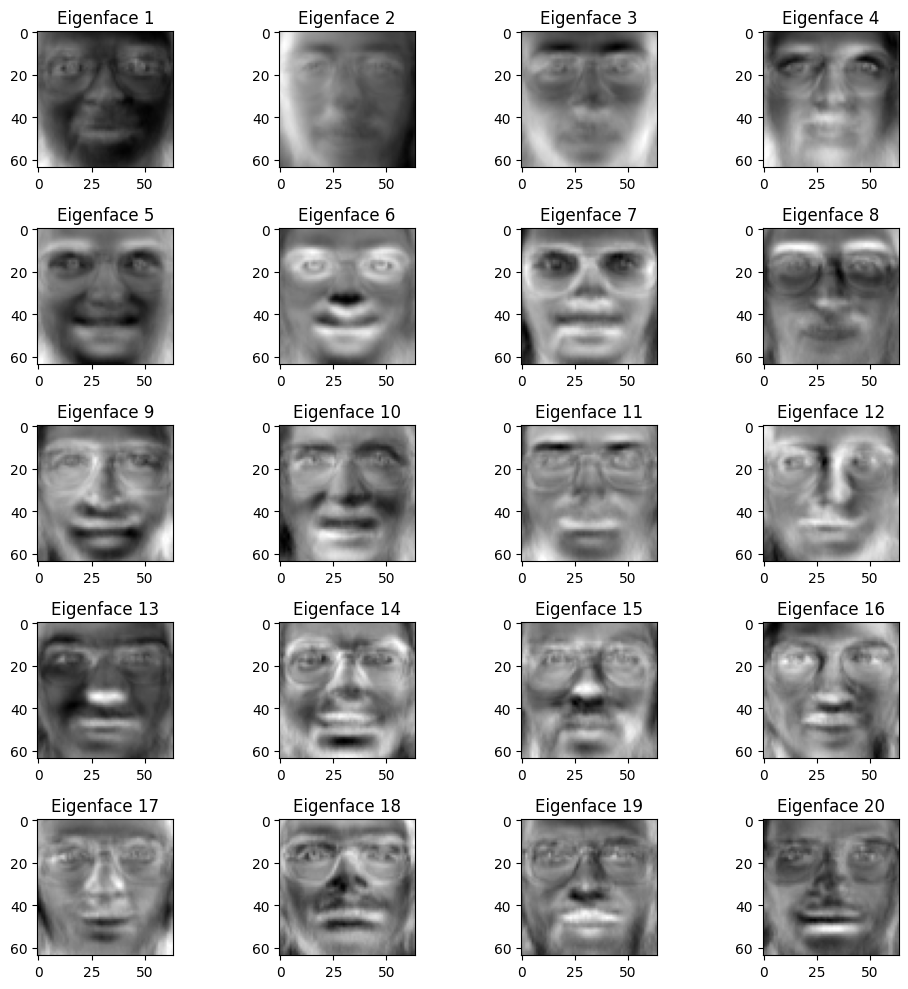

In [5]:
# Load the Olivetti faces dataset
dataset = fetch_olivetti_faces()
faces = dataset.images


# Reshape the images to 1D and stack them into a 2D array
n_samples, height, width = faces.shape
X = faces.reshape(n_samples, height * width)



# Compute the mean face
mean_face = np.mean(X, axis=0)

# Center the data
X_centered = X - mean_face


# Compute the covariance matrix
covariance_matrix = np.dot(X_centered.T, X_centered) / n_samples

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)


# Sort the eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]


# Select the top k eigenvectors (eigenfaces)
k = 20
eigenfaces = sorted_eigenvectors[:, :k]


# Project the centered data onto the eigenfaces
X_projected = np.dot(X_centered, eigenfaces)


# Reconstruct the faces from the projected data
X_reconstructed = np.dot(X_projected, eigenfaces.T) + mean_face


# Visualize the eigenfaces
plt.figure(figsize=(10, 10))
for i in range(k):
    plt.subplot(5, 4, i + 1)
    plt.imshow(eigenfaces[:, i].reshape(height, width), cmap='gray')
    plt.title(f'Eigenface {i + 1}')


plt.tight_layout()

plt.show()

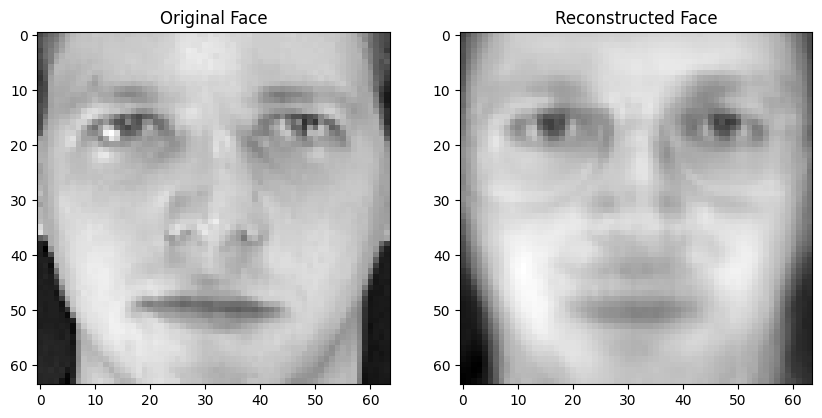

In [6]:
# Visualize the original and reconstructed faces
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(faces[0], cmap='gray')
plt.title('Original Face')

plt.subplot(1, 2, 2)
plt.imshow(X_reconstructed[0].reshape(height, width), cmap='gray')
plt.title('Reconstructed Face')

plt.show()

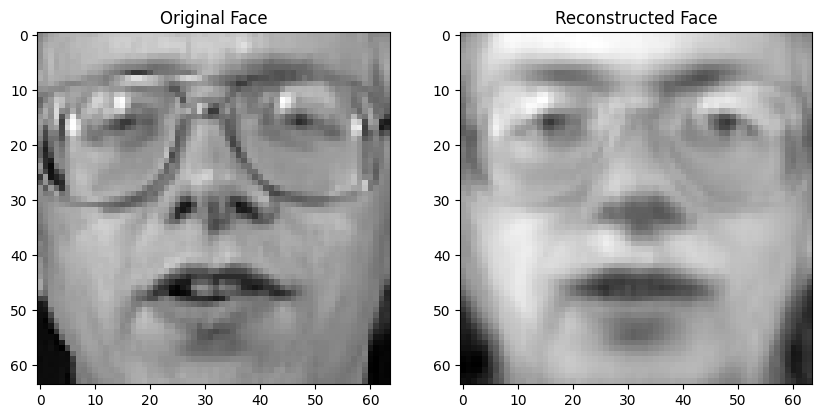

In [7]:
# Visualize the original and reconstructed faces
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(faces[10], cmap='gray')
plt.title('Original Face')

plt.subplot(1, 2, 2)
plt.imshow(X_reconstructed[10].reshape(height, width), cmap='gray')
plt.title('Reconstructed Face')

plt.show()